In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Este banco de dados se refere ao controle da COVID-19 no estado de São Paulo durante Março de 2020 a Abril de 2021. Ele inclui informações vitais, tais como:

1. **Data do Boletim:** A data em que os dados foram registrados.
2. **Número de Casos Suspeitos:** Total de casos suspeitos de COVID-19.
3. **Número de Casos Confirmados:** Total de casos confirmados de COVID-19.
4. **Mortes pelo SIVEP-Gripe:** Dados de mortalidade fornecidos pelo Sistema de Vigilância Epidemiológica da Gripe (SIVEP-Gripe).
5. **Mortes pelo SIM:** Dados de mortalidade fornecidos pelo Sistema de Informação sobre Mortalidade (SIM) do Ministério da Saúde.
6. **Percentual de UTI Utilizada em Hospitais Públicos:** A porcentagem de leitos de UTI ocupados nos hospitais públicos.
7. **Estimativa de Casos Recuperados:** Número estimado de casos que resultaram em recuperação.
8. **Cidade ou Local dos Dados:** O nome da cidade ou local a que os dados se referem.

Essas informações essenciais fornecem uma visão abrangente da situação da COVID-19 no estado de São Paulo durante o ano de 2020.

In [96]:
df_dan_cd = pd.read_csv("covidsp.csv")
df_dan_cd

,Date,Suspects,ConfirmedCases,DeathsSivep,DeathsProAim,CtiUsage,Recovered,Location
0,2020-03-23,4743,477,30,30,67,0,sao paulo
1,2020-03-24,4572,484,36,36,67,0,sao paulo
2,2020-03-25,4300,537,41,41,67,0,sao paulo
3,2020-03-26,4621,565,50,50,67,0,sao paulo
4,2020-03-27,4621,572,62,62,67,0,sao paulo
...,...,...,...,...,...,...,...,...
399,2021-04-26,0,799094,26600,26600,81,742116,sao paulo
400,2021-04-27,0,803849,26844,26844,79,744410,sao paulo
401,2021-04-28,0,808863,27027,27027,80,746368,sao paulo
402,2021-04-29,0,840834,27194,27194,80,746855,sao paulo


In [97]:
df_dan_cd.columns

Index(['Date', 'Suspects', 'ConfirmedCases', 'DeathsSivep', 'DeathsProAim',
       'CtiUsage', 'Recovered', 'Location'],
      dtype='object')

In [98]:
traducao = {
    'Date': 'Data',
    'Suspects': 'Suspeitos',
    'ConfirmedCases': 'CasosConfirmados',
    'DeathsSivep': 'MortesSivep',
    'DeathsProAim': 'MortesSIM',
    'CtiUsage': 'UTI',
    'Recovered': 'Recuperados',
    'Location': 'Localizacao'
}

# Renomeando as colunas
df_dan_cd.rename(columns=traducao, inplace=True)
df_dan_cd

,Data,Suspeitos,CasosConfirmados,MortesSivep,MortesSIM,UTI,Recuperados,Localizacao
0,2020-03-23,4743,477,30,30,67,0,sao paulo
1,2020-03-24,4572,484,36,36,67,0,sao paulo
2,2020-03-25,4300,537,41,41,67,0,sao paulo
3,2020-03-26,4621,565,50,50,67,0,sao paulo
4,2020-03-27,4621,572,62,62,67,0,sao paulo
...,...,...,...,...,...,...,...,...
399,2021-04-26,0,799094,26600,26600,81,742116,sao paulo
400,2021-04-27,0,803849,26844,26844,79,744410,sao paulo
401,2021-04-28,0,808863,27027,27027,80,746368,sao paulo
402,2021-04-29,0,840834,27194,27194,80,746855,sao paulo


In [99]:
df_dan_cd.isnull().values.any()

False

In [100]:
#Determinando o total de casos confirmados durante o periodo analisado

casos_confirmados = df_dan_cd['CasosConfirmados'].values

soma_casos_confirmados = np.sum(casos_confirmados)

soma_casos_confirmados


142122270

In [101]:
#Determinando o total de casos Suspeitos durante o periodo analisado

casos_suspeitos = df_dan_cd['Suspeitos'].values

soma_casos_suspeitos = np.sum(casos_suspeitos)

soma_casos_suspeitos

142720302

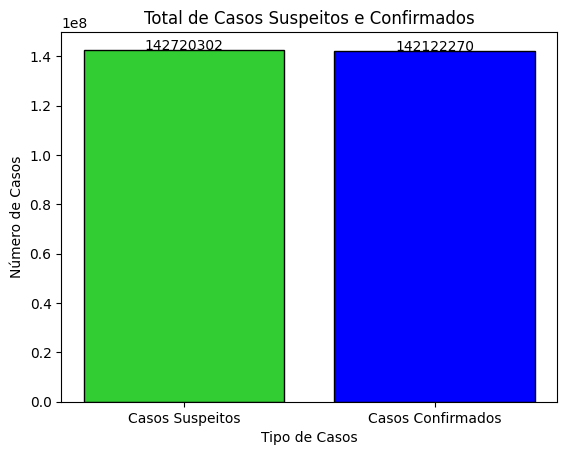

In [120]:

categorias = ['Casos Suspeitos', 'Casos Confirmados']

valores = [soma_casos_suspeitos, soma_casos_confirmados]

plt.bar(categorias, valores, color=['limegreen', 'blue'], edgecolor=['black'])

plt.xlabel('Tipo de Casos')
plt.ylabel('Número de Casos')

for i in range(len(categorias)):
    plt.text(i, valores[i] + 20, str(valores[i]), ha='center')

plt.title('Total de Casos Suspeitos e Confirmados')

plt.show()


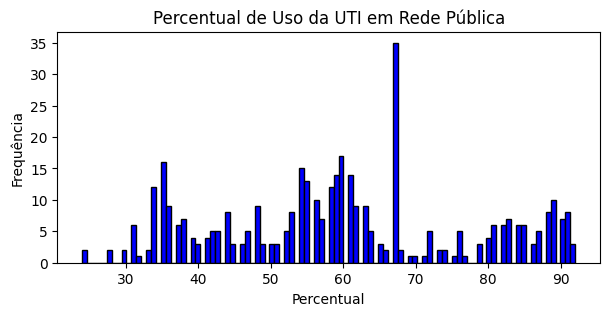

In [103]:
#Frenquencia de utilização de UTI por semana
numeros_de_uti = df_dan_cd['UTI'].values
plt.figure(figsize=(7, 3))
plt.hist(numeros_de_uti, bins=100, edgecolor='black', color='blue')
plt.xlabel('Percentual')
plt.ylabel('Frequência')
plt.title('Percentual de Uso da UTI em Rede Pública')


plt.show()

In [105]:
#Soma de mortes confirmadas pelo Sistema de Vigilância Epidemiológica da Gripe (SIVEP-Gripe)
Mortes_Sivep = df_dan_cd['MortesSivep'].values

soma_mortesSivep = np.sum(Mortes_Sivep)

soma_mortesSivep

4918732

In [106]:
#Soma de mortes confirmadas pelo Sistema de Informação sobre Mortalidade (SIM)
Mortes_Sim = df_dan_cd['MortesSIM'].values

soma_mortesSim = np.sum(Mortes_Sim)

soma_mortesSim

4912005

In [127]:
#Total e diferença de mortes Confirmadas pelas Categorias
Total_de_mortes = soma_mortesSim + soma_mortesSivep
print(f'O total de mortes confirmadas pela categoria foi de {Total_de_mortes}')
diferenca_pela_categotia = np.subtract(soma_mortesSivep, soma_mortesSim)
print(f'A diferença de mortes confirmadas por categoria foi de {diferenca_pela_categotia}')


O total de mortes confirmadas pela categoria foi de 9830737
A diferença de mortes confirmadas por categoria foi de 6727


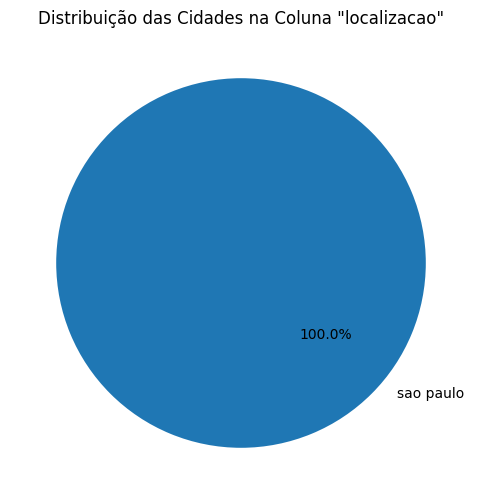

In [140]:


#Cidade onde aconteceu a coleta de dados

contagem_cidades = df_dan_cd['Localizacao'].value_counts()


plt.figure(figsize=(6, 6))
plt.pie(contagem_cidades, labels=contagem_cidades.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição das Cidades na Coluna "localizacao"')
plt.show()

